In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

**IMPORTING THE DATASET**

In [2]:
dataset = pd.read_csv('RELIANCE.csv')

In [3]:
dataset.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,RELIANCE,EQ,233.05,237.50,251.70,237.50,251.70,251.70,249.37,4456424,1.111319e+14,NaN,NaN,NaN
1,2000-01-04,RELIANCE,EQ,251.70,258.40,271.85,251.30,271.85,271.85,263.52,9487878,2.500222e+14,NaN,NaN,NaN
2,2000-01-05,RELIANCE,EQ,271.85,256.65,287.90,256.65,286.75,282.50,274.79,26833684,7.373697e+14,NaN,NaN,NaN
3,2000-01-06,RELIANCE,EQ,282.50,289.00,300.70,289.00,293.50,294.35,295.45,15682286,4.633254e+14,NaN,NaN,NaN
4,2000-01-07,RELIANCE,EQ,294.35,295.00,317.90,293.00,314.50,314.55,308.91,19870977,6.138388e+14,NaN,NaN,NaN


In [4]:
dataset.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,RELIANCE,EQ,1904.35,1920.00,1962.0,1911.50,1938.00,1937.85,1941.32,9620785,1.867699e+15,259137.0,4276703.0,0.4445
5302,2021-04-27,RELIANCE,EQ,1937.85,1940.00,1997.2,1938.25,1990.00,1988.65,1978.64,9226547,1.825602e+15,291197.0,3772144.0,0.4088
5303,2021-04-28,RELIANCE,EQ,1988.65,1997.85,2008.0,1980.15,1993.15,1997.30,1997.60,7902002,1.578508e+15,247331.0,3921560.0,0.4963
5304,2021-04-29,RELIANCE,EQ,1997.30,2022.90,2044.5,2007.30,2020.00,2024.05,2024.21,8035915,1.626634e+15,213153.0,2834103.0,0.3527
5305,2021-04-30,RELIANCE,EQ,2024.05,2008.50,2036.0,1987.55,1995.90,1994.50,2010.20,9150974,1.839532e+15,288687.0,3902504.0,0.4265


In [5]:
dataset.isna().any()

Date                  False
Symbol                False
Series                False
Prev Close            False
Open                  False
High                  False
Low                   False
Last                  False
Close                 False
VWAP                  False
Volume                False
Turnover              False
Trades                 True
Deliverable Volume     True
%Deliverble            True
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

**DATA VISUALISING**

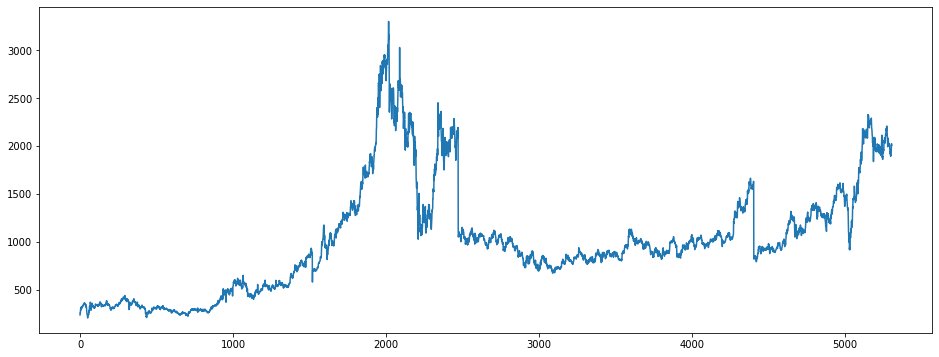

In [7]:
dataset['Open'].plot(figsize=(16,6))

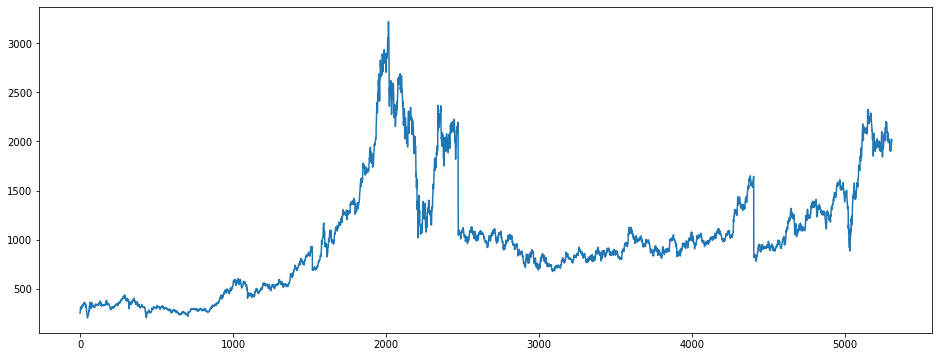

In [8]:
dataset['Close'].plot(figsize=(16,6))

In [9]:
dataset.rolling(7).mean().head(20)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,279.500000,280.271429,294.242857,273.800000,287.635714,287.421429,285.827143,1.461323e+07,4.237990e+14,NaN,NaN,NaN
7,287.421429,287.628571,301.857143,280.178571,295.207143,294.564286,292.284286,1.570653e+07,4.588813e+14,NaN,NaN,NaN
8,294.564286,294.428571,308.221429,287.721429,300.621429,300.278571,299.180000,1.679055e+07,4.992235e+14,NaN,NaN,NaN
9,300.278571,301.978571,313.042857,295.271429,304.942857,305.107143,305.091429,1.488011e+07,4.546833e+14,NaN,NaN,NaN


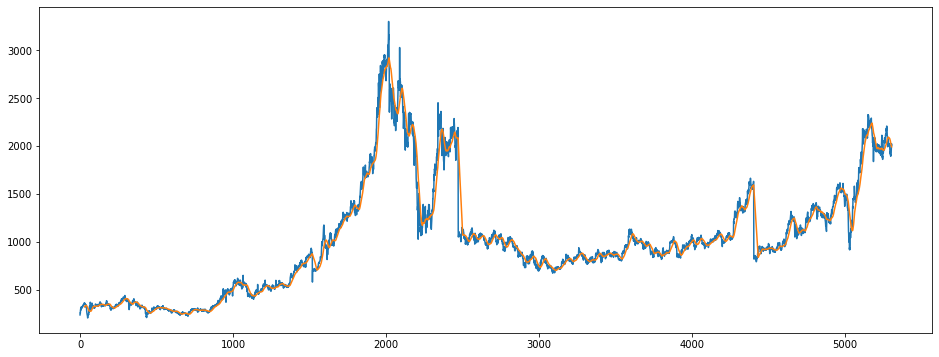

In [10]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

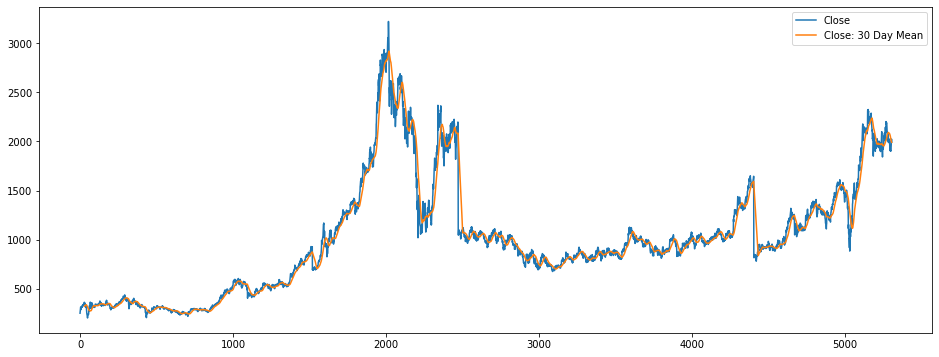

In [11]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

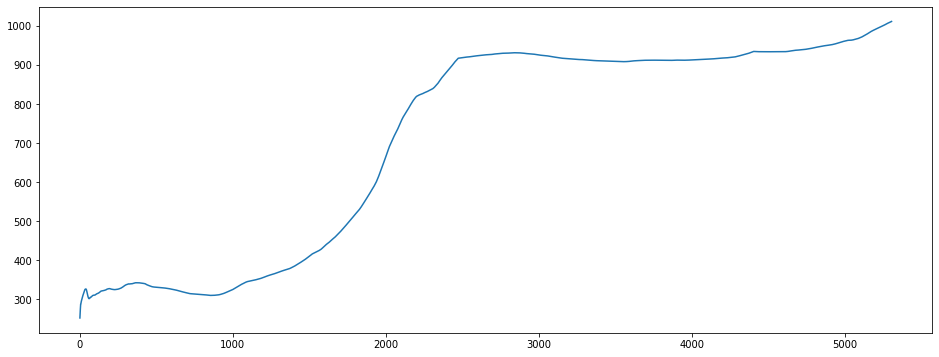

In [12]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

**BUILDING THE RNN MODEL**

In [13]:
training_set = dataset['Open']
training_set=pd.DataFrame(training_set)

In [14]:
training_set.isna().any()

Open    False
dtype: bool

In [15]:
training_set = dataset.iloc[:,4:5].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [16]:
X_train = training_set[0:5304]
y_train = training_set[1:5305]
X_train = np.reshape(X_train,(5304,1,1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
166/166 [==============================] - 7s 6ms/step - loss: 0.0536
Epoch 2/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0021
Epoch 3/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0015
Epoch 4/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0013
Epoch 5/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 6/200
166/166 [==============================] - 1s 6ms/step - loss: 9.7476e-04
Epoch 7/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 8/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 9/200
166/166 [==============================] - 1s 6ms/step - loss: 8.6726e-04
Epoch 10/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0010
Epoch 11/200
166/166 [==============================] - 1s 6ms/step - loss: 9.5226e-04
Epoch 12/200
166/166 [==============================] - 1s 6ms/step - loss: 0.0010
E

**VISUALING AND PREDICTING THE MODEL ON THE PAST 50 RESPONSES IN THE DATASET**

In [20]:
test_set = pd.read_csv('RELIANCE.csv')
real_stock_price = dataset.iloc[-50:,4:5].values

In [21]:
inputs = real_stock_price
inputs = sc.transform(inputs)

In [22]:
inputs = np.reshape(inputs,(50,1,1))
predict_stock_price = regressor.predict(inputs)

In [23]:
predicted_stock_price = sc.inverse_transform(predict_stock_price)

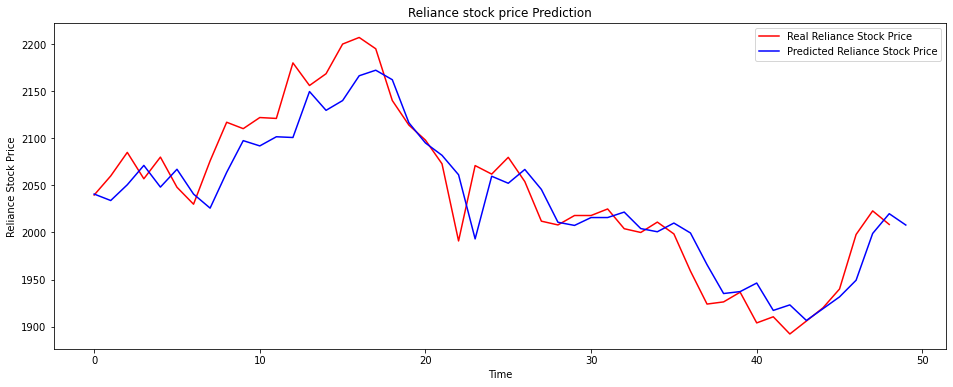

In [24]:
plt.figure(figsize=(16,6))
plt.plot(real_stock_price[1:], color='red', label='Real Reliance Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Reliance Stock Price')
plt.title('Reliance stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Reliance Stock Price')
plt.legend()
plt.show()